Bài tập

In [ ]:
# Import các thư viện cần thiết
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Đọc dữ liệu từ file CSV
file_path = "/content/Iris.csv"  # Thay đổi đường dẫn nếu cần
df = pd.read_csv(file_path)

# Hiển thị kích thước của dữ liệu
print("🔹 Kích thước dữ liệu:", df.shape)  # (150, 5)

# Mã hóa nhãn (Species)
le = LabelEncoder()
X = df.drop(["Species"], axis=1).values  # Xóa cột Species để lấy dữ liệu đầu vào
y = le.fit_transform(df["Species"].values)  # Chuyển nhãn từ string sang số

# Chia dữ liệu thành tập train (80%) và test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuyển dữ liệu thành Tensor của PyTorch
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train).reshape(-1, 1)
y_test = torch.LongTensor(y_test).reshape(-1, 1)

# Hiển thị kích thước của tập train
print(f"🔹 Kích thước tập train: {len(y_train)}")

# Kiểm tra số lượng mẫu của từng lớp trong tập train
labels, counts = y_train.unique(return_counts=True)
print("🔹 Phân bố nhãn trong tập train:")
print(labels, counts)

🔹 Kích thước dữ liệu: (150, 6)
🔹 Kích thước tập train: 120
🔹 Phân bố nhãn trong tập train:
tensor([0, 1, 2]) tensor([40, 41, 39])


In [ ]:
#Viết chương trình sử dụng PyTorch để tính đạo hàm của hàm số sau: y = 2x^4 + x^3 + 3x^2 + 5x + 1
# Import thư viện PyTorch
import torch

# Tạo một tensor x với requires_grad=True để có thể tính đạo hàm
x = torch.tensor(2.0, requires_grad=True)
print("🔹 Giá trị x:", x)

# Định nghĩa hàm y = 2x^4 + x^3 + 3x^2 + 5x + 1
y = 2*x**4 + x**3 + 3*x**2 + 5*x + 1
print("🔹 Giá trị của y:", y)

# Kiểm tra thuộc tính gradient của y
print("🔹 Gradient Function của y:", y.grad_fn)

# Thực hiện truyền ngược (backpropagation) để tính đạo hàm
y.backward()

# Kết quả đạo hàm dy/dx tại x = 2
print("🔹 Giá trị đạo hàm tại x = 2:", x.grad)

🔹 Giá trị x: tensor(2., requires_grad=True)
🔹 Giá trị của y: tensor(63., grad_fn=<AddBackward0>)
🔹 Gradient Function của y: <AddBackward0 object at 0x7c520e882aa0>
🔹 Giá trị đạo hàm tại x = 2: tensor(93.)


In [ ]:
#Cho hàm số: y = 5x^6 + 3x^3 + 2x + x + 2x + 5x^4 + 1
#Tính độ dốc (đạo hàm) của đa thức tại một điểm bất kỳ.
# Import thư viện PyTorch
import torch

# Tạo một tensor x với requires_grad=True để có thể tính gradient
x = torch.tensor(2.0, requires_grad=True)  # Thay giá trị x tại điểm bất kỳ

# Định nghĩa hàm số y = 5x^6 + 3x^3 + 2x + x + 2x + 5x^4 + 1
y = 5*x**6 + 3*x**3 + 2*x + x + 2*x + 5*x**4 + 1

# Tính đạo hàm bằng backpropagation
y.backward()

# Hiển thị độ dốc (đạo hàm) tại x = 2
print("🔹 Độ dốc (đạo hàm) tại x =", x.item(), "là:", x.grad.item())

🔹 Độ dốc (đạo hàm) tại x = 2.0 là: 1161.0


In [ ]:
# Bài tập về nhà 1
# 1.	Tạo một tensor x có giá trị ban đầu là 2.0.
# 2.	Định nghĩa hàm số: y = x^3 + x^2 + 5x + 1
# 3.	Tính đạo hàm dy/dx tại giá trị x.
# 4.	Sử dụng Gradient Descent với learning rate \alpha = 0.1 để cập nhật giá trị x trong 10 vòng lặp.

# Import thư viện PyTorch
import torch

# Bước 1: Tạo một tensor x với requires_grad=True để có thể tính gradient
x = torch.tensor(2.0, requires_grad=True)

# Bước 2: Định nghĩa hàm số y = x^3 + x^2 + 5x + 1
y = x**3 + x**2 + 5*x + 1

# Bước 3: Tính đạo hàm dy/dx bằng backpropagation
y.backward()

# Bước 4: Hiển thị kết quả đạo hàm tại x = 2
print("🔹 Giá trị đạo hàm dy/dx tại x =", x.item(), "là:", x.grad.item())

# ---------------------------- #
# Bước 5: Gradient Descent để cập nhật giá trị x #
# ---------------------------- #

# Reset lại giá trị của x
x = torch.tensor(2.0, requires_grad=True)

# Learning rate (tốc độ học)
alpha = 0.1

# Số vòng lặp
epochs = 10

# Vòng lặp cập nhật giá trị x bằng Gradient Descent
for i in range(epochs):
    # Định nghĩa lại hàm số
    y = x**3 + x**2 + 5*x + 1

    # Tính đạo hàm
    y.backward()

    # Cập nhật giá trị x theo công thức Gradient Descent: x_new = x - alpha * gradient
    with torch.no_grad():
        x -= alpha * x.grad  # Gradient Descent Step

    # Xóa gradient cũ để tránh lỗi tích lũy
    x.grad.zero_()

    # In kết quả sau mỗi vòng lặp
    print(f"🔹 Epoch {i+1}: x = {x.item()}")

🔹 Giá trị đạo hàm dy/dx tại x = 2.0 là: 21.0
🔹 Epoch 1: x = -0.10000014305114746
🔹 Epoch 2: x = -0.5830001831054688
🔹 Epoch 3: x = -1.0683668851852417
🔹 Epoch 4: x = -1.6971158981323242
🔹 Epoch 5: x = -2.7217535972595215
🔹 Epoch 6: x = -4.89978551864624
🔹 Epoch 7: x = -11.622198104858398
🔹 Epoch 8: x = -50.320404052734375
🔹 Epoch 9: x = -800.3992919921875
🔹 Epoch 10: x = -192832.53125


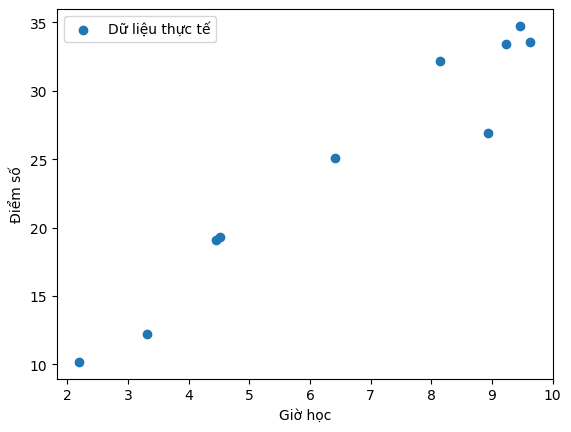

Epoch 10: Loss = 6.1985626220703125
Epoch 20: Loss = 6.101217746734619
Epoch 30: Loss = 6.009093284606934
Epoch 40: Loss = 5.921907424926758
Epoch 50: Loss = 5.839390754699707
Epoch 60: Loss = 5.761292457580566
Epoch 70: Loss = 5.687382221221924
Epoch 80: Loss = 5.617437839508057
Epoch 90: Loss = 5.5512375831604
Epoch 100: Loss = 5.488584518432617


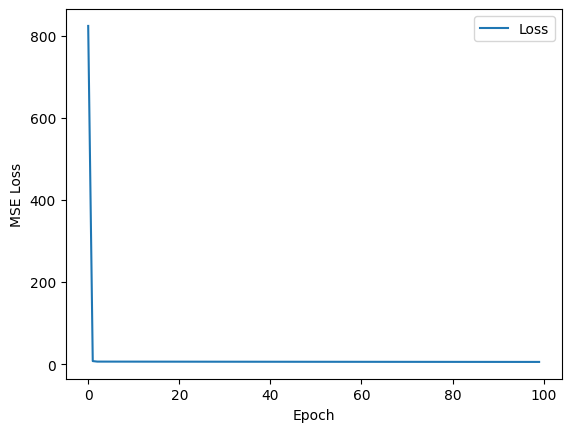

🔹 Giá trị cuối cùng của w: 3.4926841259002686
🔹 Giá trị cuối cùng của b: 1.1225351095199585


In [ ]:
# Bài tập về nhà 2
# Tạo một tập dữ liệu giả lập với x là số giờ học (ngẫu nhiên từ 1 - 10) và y là số điểm được tính theo công thức:
# y = 3x + 5 + noise
# Với noise là một giá trị ngẫu nhiên nhỏ.
# Yêu cầu:
# 	1.	Khởi tạo tham số w và b ngẫu nhiên với requires_grad=True.
# 	2.	Tính MSE (Mean Squared Error).
# 	3.	Tính gradient.
# 	4.	Cập nhật tham số w và b bằng Gradient Descent với Learning Rate \alpha = 0.01.
# 	5.	Lặp lại quá trình trên trong 100 vòng lặp và quan sát sự hội tụ của mô hình.

# Import thư viện cần thiết
import torch
import numpy as np
import matplotlib.pyplot as plt

# Bước 1: Tạo tập dữ liệu giả lập
np.random.seed(42)  # Để tái tạo kết quả giống nhau
torch.manual_seed(42)

# Tạo dữ liệu x (số giờ học) ngẫu nhiên từ 1 - 10
x = torch.FloatTensor(10).uniform_(1, 10)
noise = torch.randn(x.size()) * 2  # Tạo noise ngẫu nhiên nhỏ

# Tính y theo công thức y = 3x + 5 + noise
y = 3 * x + 5 + noise

# Hiển thị tập dữ liệu
plt.scatter(x.numpy(), y.numpy(), label="Dữ liệu thực tế")
plt.xlabel("Giờ học")
plt.ylabel("Điểm số")
plt.legend()
plt.show()

# Bước 2: Khởi tạo tham số w và b ngẫu nhiên với requires_grad=True
w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

# Learning Rate và số vòng lặp
alpha = 0.01
epochs = 100

# Lưu lại lịch sử lỗi để vẽ biểu đồ
loss_history = []

# Bước 5: Lặp quá trình Gradient Descent
for epoch in range(epochs):
    # Bước 3: Dự đoán y_hat = wx + b
    y_pred = w * x + b

    # Bước 4: Tính hàm mất mát MSE
    loss = torch.mean((y_pred - y) ** 2)
    loss_history.append(loss.item())

    # Tính gradient
    loss.backward()

    # Cập nhật w và b theo Gradient Descent
    with torch.no_grad():
        w -= alpha * w.grad
        b -= alpha * b.grad

    # Xóa gradient cũ để tránh lỗi tích lũy
    w.grad.zero_()
    b.grad.zero_()

    # In lỗi sau mỗi 10 vòng lặp
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}: Loss = {loss.item()}")

# Biểu đồ hội tụ của loss
plt.plot(range(epochs), loss_history, label="Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()

# In kết quả cuối cùng của w và b
print(f"🔹 Giá trị cuối cùng của w: {w.item()}")
print(f"🔹 Giá trị cuối cùng của b: {b.item()}")

Torch

In [ ]:
import torch
import numpy as np
print(torch.__version__)  # Kiểm tra phiên bản PyTorch

2.5.1+cu124


In [ ]:
arr = np.array([1, 2, 3, 4, 5])
print(arr)
print(arr.dtype)  # int64
print(type(arr))  # <class 'numpy.ndarray'>

x = torch.from_numpy(arr)
print(x)
print(x.dtype)  # torch.int64
print(x.type())  # torch.LongTensor

[1 2 3 4 5]
int64
<class 'numpy.ndarray'>
tensor([1, 2, 3, 4, 5])
torch.int64
torch.LongTensor


In [ ]:
arr2 = np.arange(0., 12.).reshape(4, 3)
print(arr2)

x2 = torch.from_numpy(arr2)
print(x2)
print(x2.type())  # torch.DoubleTensor

[[ 0.  1.  2.]
 [ 3.  4.  5.]
 [ 6.  7.  8.]
 [ 9. 10. 11.]]
tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]], dtype=torch.float64)
torch.DoubleTensor


In [ ]:
arr = np.arange(0, 5)
x = torch.from_numpy(arr)
print(x)

arr[0] = 99  # Thay đổi giá trị của mảng NumPy
print(x)  # Giá trị của tensor cũng thay đổi vì `from_numpy` sử dụng chung bộ nhớ với NumPy

arr = np.arange(0, 5)
x = torch.tensor(arr)  # Tạo tensor mới từ NumPy nhưng không chia sẻ bộ nhớ
print(x)

arr[0] = 99
print(x)  # Tensor không thay đổi

tensor([0, 1, 2, 3, 4])
tensor([99,  1,  2,  3,  4])
tensor([0, 1, 2, 3, 4])
tensor([0, 1, 2, 3, 4])


In [ ]:
# BTVN 3: Giải thích lý do tại sao cho 2 trường hợp trên
# Khi tạo một tensor từ mảng NumPy, cách thực hiện sẽ quyết định liệu tensor có chia sẻ bộ nhớ với mảng gốc hay không.
# 	1.	Trường hợp chia sẻ bộ nhớ (torch.from_numpy):
# 	•	Tensor được tạo ra sử dụng chung bộ nhớ với mảng NumPy. Điều này có nghĩa là bất kỳ thay đổi nào trên mảng NumPy cũng sẽ ảnh hưởng trực tiếp đến tensor.
# 	•	Nếu giá trị trong mảng NumPy thay đổi, giá trị tương ứng trong tensor cũng sẽ thay đổi theo.
# 	2.	Trường hợp không chia sẻ bộ nhớ (torch.tensor):
# 	•	Một bản sao độc lập của dữ liệu từ NumPy được tạo ra trong bộ nhớ của PyTorch.
# 	•	Khi đó, dù mảng NumPy có thay đổi sau này, tensor vẫn giữ nguyên giá trị ban đầu và không bị ảnh hưởng.

# Vì vậy, nếu muốn tensor phản ánh mọi thay đổi của mảng NumPy, hãy sử dụng torch.from_numpy. Ngược lại, nếu cần một tensor độc lập, không bị ảnh hưởng bởi mảng gốc, torch.tensor là lựa chọn phù hợp.

In [ ]:
# BTVN 4: bạn hãy giúp thầy về nhà tạo tensor với:
# - Empty
# - Zeros
# - Ones
# - Random
# - Reshape với view và view as
import torch

# 1. Tạo tensor rỗng (empty)
empty_tensor = torch.empty(3, 3)  # Tạo tensor 3x3 với giá trị chưa khởi tạo
print("Empty Tensor:")
print(empty_tensor)

# 2. Tạo tensor toàn số 0 (zeros)
zeros_tensor = torch.zeros(3, 3)  # Tạo tensor 3x3 chứa toàn số 0
print("\nZeros Tensor:")
print(zeros_tensor)

# 3. Tạo tensor toàn số 1 (ones)
ones_tensor = torch.ones(3, 3)  # Tạo tensor 3x3 chứa toàn số 1
print("\nOnes Tensor:")
print(ones_tensor)

# 4. Tạo tensor với giá trị ngẫu nhiên (rand)
random_tensor = torch.rand(3, 3)  # Tạo tensor 3x3 với giá trị ngẫu nhiên trong khoảng [0,1]
print("\nRandom Tensor:")
print(random_tensor)

# 5. Thay đổi kích thước tensor với view() và view_as()
x = torch.arange(12)  # Tạo tensor 1D có 12 phần tử từ 0 đến 11
reshaped_tensor = x.view(3, 4)  # Reshape thành (3x4)
print("\nReshaped Tensor (using view):")
print(reshaped_tensor)

y = torch.zeros_like(reshaped_tensor)  # Tạo tensor có cùng kích thước với reshaped_tensor
new_tensor = x.view_as(y)  # Reshape x theo kích thước của y
print("\nTensor Reshaped Using view_as:")
print(new_tensor)

Empty Tensor:
tensor([[1.7466e-33, 0.0000e+00, 1.5002e-33],
        [0.0000e+00, 1.1210e-43, 0.0000e+00],
        [1.1210e-43, 0.0000e+00, 9.3957e-34]])

Zeros Tensor:
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

Ones Tensor:
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

Random Tensor:
tensor([[0.5469, 0.2831, 0.7414],
        [0.2805, 0.0366, 0.3406],
        [0.6120, 0.8845, 0.0392]])

Reshaped Tensor (using view):
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

Tensor Reshaped Using view_as:
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


In [ ]:
def mean_confidence_interval(lower_limits, upper_limits, counts, confidence_level):
    # Lọc bỏ giá trị None
    valid_lower = [x for x in lower_limits if x is not None]
    valid_upper = [x for x in upper_limits if x is not None]

    # Tính trung bình của các giá trị hợp lệ
    lower_mean = sum(valid_lower) / len(valid_lower) if valid_lower else 0
    upper_mean = sum(valid_upper) / len(valid_upper) if valid_upper else 0

    return lower_mean, upper_mean

In [ ]:
def main():
    # Chiều cao giới hạn dưới và trên tương ứng cho mỗi nhóm và số lượng cây trong mỗi nhóm
    lower_limits = [None, 180, 190, 200, 210, 220, 230]
    upper_limits = [180, 190, 200, 210, 220, 230, None]
    counts = [3, 12, 35, 70, 62, 33, 8]
    confidence_level = 0.99

    lower_bound, upper_bound = mean_confidence_interval(lower_limits, upper_limits, counts, confidence_level)
    print(f'\nKhoảng ước lượng trung bình chiều cao cây với độ tin cậy {confidence_level * 100}%: '
          f'({lower_bound:.3f}, {upper_bound:.3f})')

main()


Khoảng ước lượng trung bình chiều cao cây với độ tin cậy 99.0%: (205.000, 205.000)
